<a href="https://colab.research.google.com/github/Veroberg/Projeto_Final_Awari/blob/main/C%C3%B3pia_de_PROJETO_AWARI_Ver%C3%B4nica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<h2><p style="background-color:beige; color:black"><a><b>A otimização do atendimento em loja virtual de roupas</h2></p></b></a>


### I - Exposição do problema


### Identificação do problema do projeto a ser resolvido

*Analisar os pontos positivos e negativos proporcionados pelo atendimento fornecido pela loja virtual com intuíto de gerar qualidade e aprimoramento, entendendo os fatores que impactam a satisfação do cliente com experiência de compra no site.*

### O motivo de solucionar o problema

*Gerar qualidade de atendimento ao cliente, oferecendo produtos  adequados à suas necessidades, e portanto gerando satisfação. Com isto, haverá fidelizações de clientes à loja, tornando um possível aumento de retenção.
Perguntas chaves a serem respondidas como uma solução ao problema: Qual o impacto financeiro causado por cada cliente insatisfeito com o atendimento? Qual o valor do investimento aplicado pela loja afim de solucionar problemas gerados e levantar a imagem da loja*

### Proposta de solução do problema

*Serão identificadas as variáveis que afetam e influenciam a experiência dos clientes, adotando uma modelagem de dados, usando técnicas de Machine Learning para descobrir os fatores que impactam a variável de avaliação ao atendimento direcionado aos clientes, e que permitirá criar e adotar formas de melhorias à esse atendimento.*

### A forma da utilização dos dados escolhidos para resolver o problema e a identificação das informações a serem solucionadas

* A cada pedido feito pelos clientes, gera uma variável de avaliação sobreo atendimento oferecido, assim como variáveis que disponibiliza o perfil de cada cliente que comprou, e de cada produto adquirido. Portanto caberá nessa análise, criar um modelo através deste conjunto de informações armazenadas, e descobrir quais delas impacta no feedback do cliente. As informações necessárias, que se tornam o foco de estudo e análise são, estudar o comportamento dos consumidores, selecionar os pontos que os influenciam a consumir certos produtos, identificando tendências de mercado.
 cada etapa abrange a transformação de dados em informações, ou seja, cada coluna do dataset serão adaptadas de acordo com a sua necessidade, dicionários serão object, números inteiros serão int, textos serão string, dentre outros, de acordo com o valor que foi inserido na coluna. Além disso serão detectados valores nulos (NaN), que são incoerentes com o tipo esperado para as colunas, através do método info(), tratados com o método df.fillna(), e excluídos com a função dropna.
Após, serão estruturadas pelo método plot(), podendo mesclar e gerar novas colunas, assim como exclui-las e analisa-las através de variáveis recebidas dividindo-as para encaixa-las em cada parte a ser analisada, escolhendo modelos de simulação e estatística, que seria preditivo utilizado sklearn.* 

### II - Coleta ou Importação dos dados

### Dados escolhidos para usar no projeto e o local de sua disponilidade

*Os dados utilizados estão disponíveis [neste link](https://www.kaggle.com/rmisra/clothing-fit-dataset-for-size-recommendation?select=renttherunway_final_data.json) do kaggle. Eles são da RentTheRunWay, um site onde você pode **alugar** peças roupas.


### Leitura dos dados

*Carregando o Dataframe em memória utilizando a biblioteca Pandas para poder ler os dados, porque estão no formato JSON,. Extraindo valores das colunas ao passar o caminho do arquivo, informando a linha 'lines=True' depois da vírgula.*


In [3]:
# Importação das bibliotecas pandas, numpy, matplotlib, seaborn, json (Obs: O "as" é um “apelido”, permitindo eu digitar um código 'pd, em vez de escrever'pandas)

import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Permite os gráficos gerados serem mostrados dentro do notebook

%matplotlib inline

# Adiciona cores e padrões diferentes para personalizar os gráficos

plt.style.use('ggplot')

# Cria subclasses de tupla com campos nomeados 

from collections import namedtuple

# Biblioteca que permite trabalhar com mapas

!pip install folium  

# Aciona a importação de vários módulos dentro do Matplotlib

%pylab inline

# Permite a  manipulação de dados geoespaciais no Python

!pip install geopandas
import geopandas as gpd

from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

np.random.seed(2)

# Acesso a mapas

!pip install folium

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Importação dos dados a serem analisados

assessment = pd.read_json("/content/renttherunway_final_data.json", lines=True)

### Leitura dos dados.

*Imprimindo algumas linhas com o método head().T, exibindo os dados.*


In [5]:
# LEIA AS PRIMEIRAS LINHAS DOS SEUS DADOS AQUI

# Depois de importar o DataFrame, abre um conjunto de dados, permitindo visualizar.

assessment.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
fit,fit,fit,fit,fit,fit,fit,fit,fit,fit,fit,small,large,fit,large,fit
user_id,420272,273551,360448,909926,151944,734848,336066,86661,166228,154309,185966,533900,87660,391778,721308
bust size,34d,34b,NaN,34c,34b,32b,34c,34d+,36d,32b,34b,34b,36a,36d,34b
item_id,2260466,153475,1063761,126335,616682,364092,568429,130259,1729232,1729232,1077123,130259,1295171,143094,123793
weight,137lbs,132lbs,NaN,135lbs,145lbs,138lbs,112lbs,118lbs,NaN,114lbs,135lbs,135lbs,120lbs,142lbs,118lbs
rating,10,10,10,8,10,8,10,10,10,10,8,8,10,8,10
rented for,vacation,other,party,formal affair,wedding,date,everyday,formal affair,formal affair,formal affair,party,wedding,party,party,formal affair
review_text,An adorable romper! Belt and zipper were a lit...,I rented this dress for a photo shoot. The the...,This hugged in all the right places! It was a ...,I rented this for my company's black tie award...,I have always been petite in my upper body and...,Didn't actually wear it. It fit perfectly. The...,This dress is so sweet. I loved the print. The...,Fit was great. Maybe a little tight under the ...,I was nervous of it looking cheap when it arri...,The dress was very flattering and fit perfectl...,The dress arrived with a small hole in the bea...,This dress was absolutely gorgeous and I recei...,The S was snug but in a good way. I wore a pus...,I ordered this dress as a replacement because ...,"Fit great, super flattering"
body type,hourglass,straight & narrow,NaN,pear,athletic,athletic,hourglass,full bust,full bust,petite,athletic,pear,straight & narrow,apple,athletic
review_summary,So many compliments!,I felt so glamourous!!!,It was a great time to celebrate the (almost) ...,Dress arrived on time and in perfect condition.,Was in love with this dress !!!,Traditional with a touch a sass,LITERALLY THE CUTEST DRESS EVER,"Great dress, beautifully made. I received lot...",Great for black tie event!,This dress was everything! It was perfect for ...,It was fun to wear a dress I wouldn't normally...,"Stunning dress, perfect for a New Year's Eve w...",This dress made me feel so confident & sexy!,Ordered this as a replacement dress,Stunning gown. Wore this for heart ball and re...


### III - Preparação dos dados

### Quais colunas pertencem aos dados e seus significados

*As colunas presentes neste Dataset são:*

* 'fit' = formato, tamanho das peças de roupas*

*-'user_id': identificação do usuário;*

*-'bust size': tamanho do busto;*

*-'item_id': identificação de cada tipo de roupa;*

*-'weight': peso; 'rating':  atribuída pelos clientes;*

*-'rented for': para qual ocasião a peça de roupa comprada será urtilizada;*

*-'review_text': feedback sobre os produtos comprados pelos clientes;*

*-'body type': tipo de corpo;*

*-'review_summary': opininião atribuída pelos clientes dante da compra efetuada*

*-'category': categoria de cada produto;*

*-'height': altura;*

*-'size': tamanho do cliente;*

*-'age': idade;*

*-'review_date': data revisada.*


In [6]:
# EXIBIÇÃO DAS COLUNAS DOS DADOS

# Substitui espaços por "_" no nome das colunas

assessment.columns = assessment.columns.str.replace(' ', '_', regex=True)

#Exibe as colunas 

assessment.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'weight', 'rating',
       'rented_for', 'review_text', 'body_type', 'review_summary', 'category',
       'height', 'size', 'age', 'review_date'],
      dtype='object')

In [7]:
# EXIBIÇÃO DAS COLUNAS DOS DADOS

assessment.dtypes

fit                object
user_id             int64
bust_size          object
item_id             int64
weight             object
rating            float64
rented_for         object
review_text        object
body_type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

***Algumas colunas são do tipo 'object', outras int64, e outras float64.***

In [8]:
# EXIBIÇÃO DA QUANTIDADE DE LINHAS E DE COLUNAS DOS DADOS

assessment.shape

(192544, 15)

***São 192.544 linhas e 15 colunas.***

***Os dados foram lidos corretamente e estão prontos para serem analisados, como as colunas que possuem as informações reais, e por isso é preciso trata-las corretamente com código que consigam serem rodados, permitindo uma análise segura. Mais em: https://realpython.com/python-data-types/***

### Identificação das colunas desnecessárias para a análise

*É importante manter as colunas chaves e descartar as menos impactantes em relação à solução do problema em questão, ressaltando as variáveis que devem ser retiradas.*

*Através de uma análise, será removido as seguintes variáveis:*

*user_id (Identificador do usuário): Como Não poderá ser controlado os clientes que por exemplo são difíceis de poder agradar, então esta coluna é retirada.*

*review_date (Data de avaliação): Não afeta a questão da análise da qualidade do produto ou da experiência do cliente, então também esta coluna será retirada.*

*review_text & review_summary: São variáveis de textos podendo escrever livremente. Por oprecisar de uma técnica mais sofisticada de avaliação, para esta análise não será necessária esta coluna.*

*OBS: Como um Data Science tem um trabalho que envolve pensar, testar e revisar, se houver opiniões diferentes, terá liberdade de incorporar variáveis que poderão complementar e enriquecer este conteúdo.*

In [9]:
# REMOÇÃO DAS COLUNAS INÚTEIS PARA A ANÁLISE

assessment.drop(['user_id', 'review_date', 'review_text', 'review_summary'], axis=1, inplace=True)
assessment

,fit,bust_size,item_id,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,2252812,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,682043,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,683251,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,126335,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


### A necessidade de verificar se precisará juntar dois ou mais conjunto de dados e como será feito

*Não é necessário, pois todos os dados necessários para análise, estão em um só lugar. Surgindo curiosidade sobre o assunto, procurar pelo pandas.merge(), que resolverá esse tipo de situação.*

### Verificar se os dados tem missing values (NaN), e estratégia a ser adotada para lidar com eles

*Para lidar com missing values, pode excluir as linhas identificadas e preencher estes espaços vazios com algum valor (geralmente média, mediana, moda, 0...) e também criar uma coluna para sinalizar quando eles ocorrem.* 

*Identificou muitos dados e poucos missing values, e não há como saber ainda quais colunas são relevantes para medir a satisfação, e a maioria dos modelos e análises são prejudicadas pela presença de campos em branco. Então haverá exclusão de todas as linhas que tem missing values.*
*Missing values podem ser informativos representando a ausência de uma característica. As respostas observadas são: sim, não e Nan. O NaN pode ajudar a inferir em uma determinada informação, e removê-la significa eliminar informações incompatívveis.*

In [11]:
# VERIFICAÇÃO DOS DADOS QUE POSSUEM MISSING VALUES

missing_data_por_coluna = assessment.isnull().sum() / assessment.shape[0]
round(missing_data_por_coluna*100,2).sort_values(ascending=False)

weight        15.57
bust_size      9.56
body_type      7.60
age            0.50
height         0.35
rating         0.04
rented_for     0.01
size           0.00
category       0.00
item_id        0.00
fit            0.00
dtype: float64

In [12]:
# LIDANDO COM MISSING VALUES

n_linhas_antes = assessment.shape[0]
assessment.dropna(inplace=True)
n_linhas_depois = assessment.shape[0]

print('Linhas antes de remover missing values:', n_linhas_antes,'\n','Linhas depois de remover missing values:', n_linhas_depois)

Linhas antes de remover missing values: 192544 
 Linhas depois de remover missing values: 146381


***Foram perdidas 46.163 linhas no processo, cerca de 24% dos dados. No caso da coluna 'weight', se não não mostrar a sua importância na análise, há como voltar aqui neste local e remove-la.***

### Colunas a serem tratadas antes de serem analisadas, e os seus tipos de tratamento

* Análisar se cada tipo de coluna está com o tipo certo, e então haverá a remoção das duplicatas (dados repetidos). Ainda poderá restar textos e outros caracteres interferindo nos dados.

* Acoluna fit, item_id, rented for, body type e category tem que ser uma ou do tipo categoria ou do tipo texto (string); a bust size, weight, rating, height, size e age tem que ser numéricas.*

*O item_id não pode ser numérico porque esse número representa um produto e não uma quantia. Somar o produto 1234 e o 4321 não faz sentido! Geralmente os dados se encaixam em um deste tipos:*

*- Contínuos: números quebrados (R$ 3.71)*
*- Discretos: números redondos (4 un.)*
*-Ordinais: Representam uma ordem (1º, 2º, 3º)*
*-Nominais: São categorias não ordenáveis (Maculino, Feminino)*


In [13]:
# REMOÇÃO DE CARACTERES INDESEJADOS DE SUAS COLUNAS

assessment.columns

Index(['fit', 'bust_size', 'item_id', 'weight', 'rating', 'rented_for',
       'body_type', 'category', 'height', 'size', 'age'],
      dtype='object')

In [14]:
# REMOÇÃO DE CARACTERES INDESEJADOS DE SUAS COLUNAS

# Remove o lbs depois do número em weight

assessment['weight'] = assessment['weight'].str.replace('lbs', '')

# Substitui o ' por . em height

assessment['height'] = assessment['height'].str.replace("'", '.')

# Remove o " em height

assessment['height'] = assessment['height'].str.replace('"', '')

# Remove espaços em branco em height

assessment['height'] = assessment['height'].str.replace(' ', '')

# Remove as letras na coluna bust size

assessment['bust_size'] = assessment['bust_size'].str.replace('[^0-9]','') # Essa linha usa REGEX ou expressões regulares
assessment.head(5)

,fit,bust_size,item_id,weight,rating,rented_for,body_type,category,height,size,age
0,fit,34,2260466,137,10.0,vacation,hourglass,romper,5.8,14,28.0
1,fit,34,153475,132,10.0,other,straight & narrow,gown,5.6,12,36.0
3,fit,34,126335,135,8.0,formal affair,pear,dress,5.5,8,34.0
4,fit,34,616682,145,10.0,wedding,athletic,gown,5.9,12,27.0
5,fit,32,364092,138,8.0,date,athletic,dress,5.8,8,45.0


***As letras presentes na coluna bust_size representam variações de tamanho no busto, por exemplo: 34a < 34b, jogando fora essa informação , podendo ser considerado errado. Mas para medir a satisfação do cliente, não precisará de muitos detalhes, como o tamanho do busto dele; ter uma noção mais geral sobre a situação.***

In [15]:
# REMOÇÃO DE DADOS DUPLICADOS

numero_linhas_antes = assessment.shape[0]

# Remove duplicatas

assessment.drop_duplicates(inplace=True)

numero_linhas_depois = assessment.shape[0]

print("Número de linhas antes de remover duplicatas:", numero_linhas_antes, '\n',
      "Número de linhas depois de remover duplicatas:", numero_linhas_depois)

Número de linhas antes de remover duplicatas: 146381 
 Número de linhas depois de remover duplicatas: 146169


In [16]:
# CHECANDO OS TIPOS DE DADOS

assessment.dtypes

fit            object
bust_size      object
item_id         int64
weight         object
rating        float64
rented_for     object
body_type      object
category       object
height         object
size            int64
age           float64
dtype: object

In [17]:
# MUDANDO O TIPO DAS COLUNAS DOS SEUS DADOS AQUI (datetime, floats, integers, strings , etc...)

# Essa função tenta fazer automaticamente a mudança do tipo dos dados para o melhor tipo

assessment = assessment.convert_dtypes()
print(assessment.dtypes)

fit           string
bust_size     string
item_id        Int64
weight        string
rating         Int64
rented_for    string
body_type     string
category      string
height        string
size           Int64
age            Int64
dtype: object


*** A função foi útil mas não o suficiente.***

In [18]:
# CORREÇÕES MANUAIS

assessment = assessment.astype({'bust_size': int,
                'item_id': str,
                'height': float,
                'weight': int
                })

assessment.dtypes

fit            string
bust_size       int64
item_id        object
weight          int64
rating          Int64
rented_for     string
body_type      string
category       string
height        float64
size            Int64
age             Int64
dtype: object

***Há diversos tipos de dados que são extremamente úteis: category (especialmente para categoria ordinais) e datetime (para data e/ou hora).***

### IV - Análise exploratória

### O percurso da exploração dos dados

*1) Análise exploratória, permitindo compreender os dados e suas relações.*
*2) Modelagem.*
*Etapas a seguir:*
*a) Analisar as repetidas vezes da ocorrencia de cada um dos valores das colunas, permitindo encontrar anomalias e trazendo entendimento sobre as características dos dados analisados.*
*b) Correlacionar as variáveis com a satisfação dos clientes, resultando em uma prévia das variáveis que podem ser mais adequadas para que possa responder as perguntas advindas do  problema a ser solucionado, ajudando a interpretar os resultados.*

### Estudando a distribuição individual das variáveis

In [19]:
# FUNÇÃO DOS PANDAS QUE AJUDA A EXPLORAR OS DADOS

assessment.describe(include='all')

,fit,bust_size,item_id,weight,rating,rented_for,body_type,category,height,size,age
count,146169,146169.000000,146169,146169.000000,146169.000000,146169,146169,146169,146169.000000,146169.000000,146169.000000
unique,3,NaN,5736,NaN,NaN,9,7,68,NaN,NaN,NaN
top,fit,NaN,126335,NaN,NaN,wedding,hourglass,dress,NaN,NaN,NaN
freq,107558,NaN,1524,NaN,NaN,42561,43917,70330,NaN,NaN,NaN
mean,NaN,34.110790,NaN,137.213746,9.081597,NaN,NaN,NaN,5.471759,11.439683,34.089677
std,NaN,1.702269,NaN,21.543732,1.438055,NaN,NaN,NaN,0.267344,7.828208,8.114146
min,NaN,28.000000,NaN,50.000000,2.000000,NaN,NaN,NaN,4.100000,0.000000,0.000000
25%,NaN,32.000000,NaN,123.000000,8.000000,NaN,NaN,NaN,5.300000,4.000000,29.000000
50%,NaN,34.000000,NaN,135.000000,10.000000,NaN,NaN,NaN,5.500000,9.000000,32.000000
75%,NaN,36.000000,NaN,148.000000,10.000000,NaN,NaN,NaN,5.700000,16.000000,37.000000


In [20]:
# Na tabela 'weights' == 50 lbs. 50 lbs é cerca de 22 kg, supondo serem crianças

print('Pessoas com menos de cerca de 30 kg:', assessment[assessment.weight < 70].shape[0])
assessment[assessment.weight < 70]

Pessoas com menos de cerca de 30 kg: 6


,fit,bust_size,item_id,weight,rating,rented_for,body_type,category,height,size,age
16191,fit,38,195406,50,8,wedding,pear,gown,5.0,45,46
31457,fit,34,180843,50,10,party,athletic,dress,5.6,12,29
94849,small,34,195613,50,10,party,athletic,mini,5.6,16,29
112440,fit,38,127865,58,10,formal affair,hourglass,gown,5.8,21,44
138128,fit,34,2590191,50,10,party,athletic,jumpsuit,5.6,12,29
153152,fit,34,187984,50,8,party,athletic,dress,5.6,16,29


In [21]:
# Há pessoas com menos de 18 anos alugando roupas. Supondo serem crianças ou algum erro de digitação

print('Pessoas com menos de 18 anos:', assessment[assessment.age < 18].shape[0])
print('Pessoas com menos de 10 anos:', assessment[assessment.age < 10].shape[0])
print('Pessoas com menos de 5 anos:', assessment[assessment.age < 5].shape[0])
print('Pessoas com menos de 1 ano:', assessment[assessment.age < 1].shape[0])
print('Pessoas com mais de de 100 anos:', assessment[assessment.age > 100].shape[0])
assessment[assessment.age < 1].head(10)

Pessoas com menos de 18 anos: 196
Pessoas com menos de 10 anos: 41
Pessoas com menos de 5 anos: 40
Pessoas com menos de 1 ano: 21
Pessoas com mais de de 100 anos: 43


,fit,bust_size,item_id,weight,rating,rented_for,body_type,category,height,size,age
2029,fit,34,1746190,125,10,other,straight & narrow,dress,5.7,4,0
11515,fit,34,1451390,125,10,wedding,straight & narrow,maxi,5.7,4,0
14814,fit,36,1110676,125,8,party,petite,maxi,5.5,7,0
15112,fit,34,1009409,130,10,wedding,hourglass,dress,5.8,14,0
27691,large,34,2297075,130,10,everyday,hourglass,coat,5.8,8,0
35725,fit,34,163328,125,10,formal affair,straight & narrow,gown,5.7,5,0
38203,fit,34,632507,170,10,wedding,athletic,sheath,5.1,20,0
46224,fit,34,2797877,130,8,date,hourglass,top,5.8,8,0
55943,fit,34,1371685,130,10,formal affair,hourglass,dress,5.8,12,0
56796,fit,36,2215805,155,8,wedding,hourglass,jumpsuit,5.3,20,0


10    64.40
8     27.86
6      5.70
4      1.51
2      0.54
Name: rating, dtype: float64


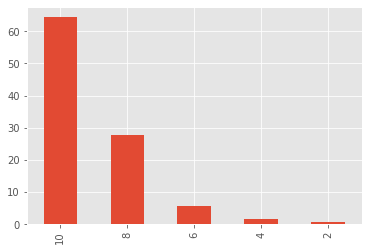

In [22]:
# Histograma da variável 'rating'

assessment_ratings = round((assessment.rating.value_counts()/assessment.shape[0])*100,2)
print(assessment_ratings)
assessment_ratings.plot.bar()


***O foco é minimizar a insatisfação dos clientes do site. Clientes que deram notas abaixo de 7 no feedback de compra , são somente 7.75% na questão de insatisfação. Este é o limite do quanto a experiência de aluguel de roupas será aperfeiçoada através da união de dados que ajudará a mostrar o que foi descoberto para o cliente - a loja, conversar e entender se ele estava ciente, e de que formas esta taxa se converte em um problema para ele.***

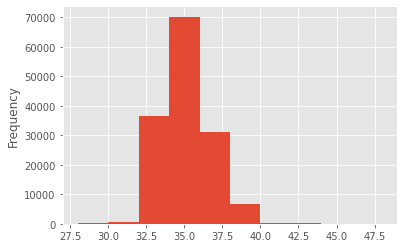

In [23]:
# Histograma da variável bust_size

assessment['bust_size'].plot.hist()

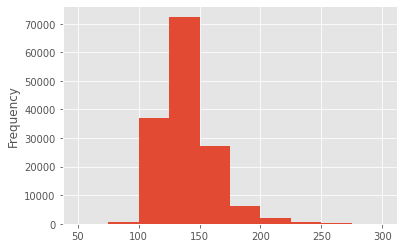

In [24]:
# Histograma da variável weight

assessment['weight'].plot.hist()

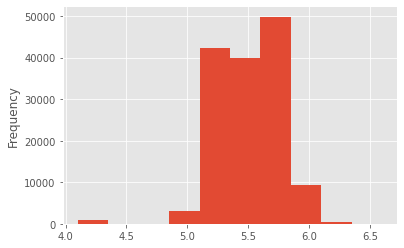

In [25]:
# Histograma da variável height

assessment['height'].plot.hist()

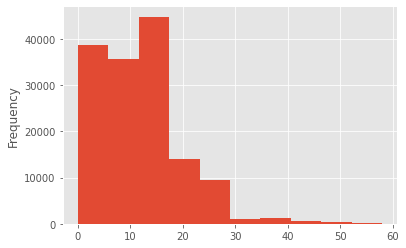

In [26]:
# Histograma da variável size

assessment['size'].plot.hist()

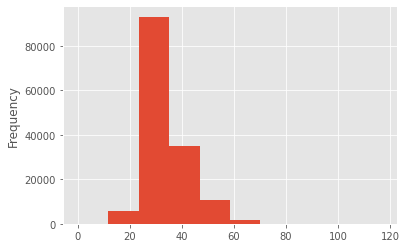

In [27]:
# Histograma da variável age

assessment['age'].plot.hist()

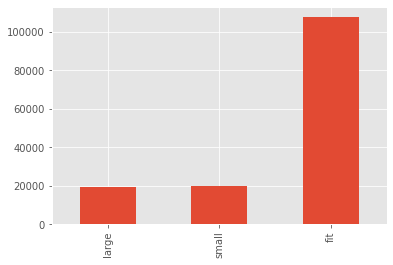

In [28]:
# Gráfico de barras da variável fit

assessment['fit'].value_counts().sort_values().plot.bar()

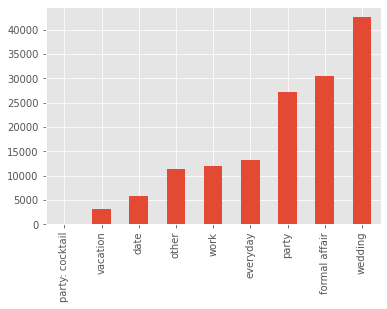

In [29]:
# Gráfico de barras da variável rented_for

assessment['rented_for'].value_counts().sort_values().plot.bar()

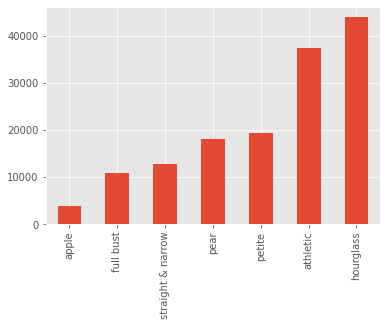

In [30]:
# Gráfico de barras da variável fit

assessment['body_type'].value_counts().sort_values().plot.bar()

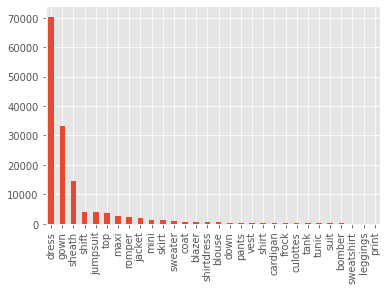

In [31]:
# Gráfico de barras da variável category

assessment['category'].value_counts().sort_values(ascending=False).head(30).plot.bar()

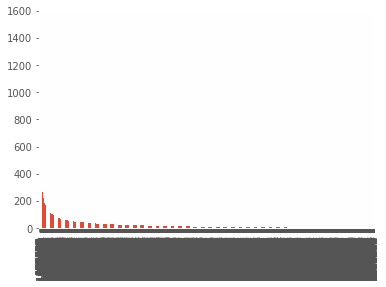

In [32]:
# Diversas categorias vêem esta variável desta forma, necessitando pensar em outra

assessment['item_id'].value_counts().sort_values(ascending=False).plot.bar()

In [33]:
# Número de produtos únicos

len(assessment.item_id.unique())

5736

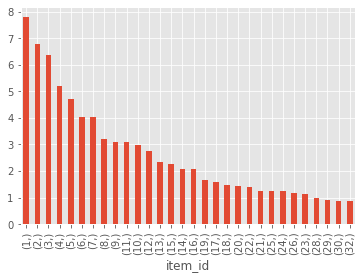

In [34]:
# Quantidade de vezes cada produto foi alugado e então essa informação  é guardada em assessment_contagem_produtos

assessment_contagem_produtos = pd.DataFrame(assessment.item_id.value_counts())

# Quantos porcentos os produtos foram usados 1, 2, 3 vezes.....então multiplicando por 100 e arredonda

assessment_contagem_produtos = round((assessment_contagem_produtos.value_counts() / len(assessment.item_id.unique()))*100,2)

# Plotando a porcentagem de vezes que um produto foi usado 1, 2, 3 vezes...

assessment_contagem_produtos.head(30).plot.bar()

***O 'itens_id' foram observados para ver se os produtos tendem a ser mais novos ou mais velhos, pois alugar uma roupa muito usada, traz um impacto negativo na satisfação.***

### Relação entre as variáveis e a satisfação

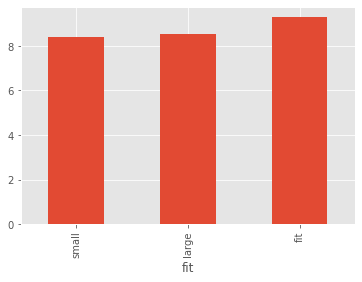

In [35]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['fit']).rating.mean().sort_values().plot.bar()

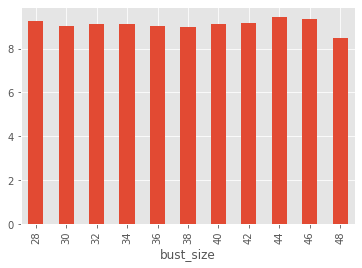

In [36]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['bust_size']).rating.mean().plot.bar()

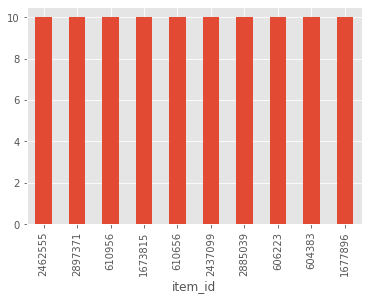

In [37]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['item_id']).rating.mean().sort_values(ascending=False).head(10).plot.bar()

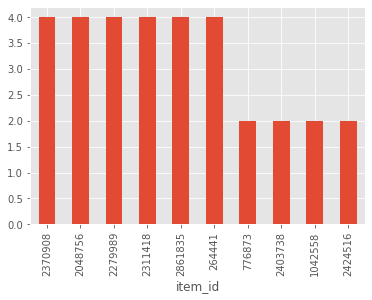

In [38]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['item_id']).rating.mean().sort_values(ascending=False).tail(10).plot.bar()

In [39]:
# Quantidade de usos tem cada produto 

serie_itens_contagem = assessment.item_id.value_counts()

# Média de 'rating' destes produtos

serie_itens_media = assessment.groupby(['item_id']).rating.mean()

In [40]:
# Os dois são transformados em dataframes

assessment_itens_contagem = pd.DataFrame(serie_itens_contagem)
assessment_itens_media = pd.DataFrame(serie_itens_media)

# União dos dois dataframes pelo index

assessment_uso_vs_ratings = assessment_itens_contagem.merge(assessment_itens_media, left_index=True,right_index=True)

# Renomeando as colunas

assessment_uso_vs_ratings.columns = ['usos','rating_medio']

# Exibição da correlação dos dois

assessment_uso_vs_ratings.corr()

,usos,rating_medio
usos,1.000000,0.046124
rating_medio,0.046124,1.000000


***Correlação fraca.***

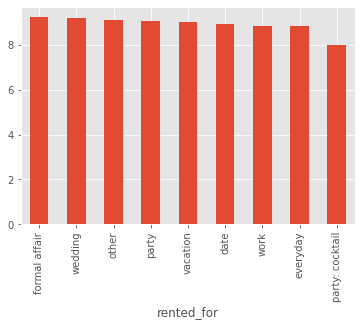

In [41]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['rented_for']).rating.mean().sort_values(ascending=False).head(30).plot.bar()

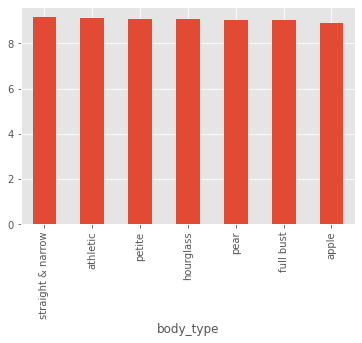

In [42]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['body_type']).rating.mean().sort_values(ascending=False).head(10).plot.bar()

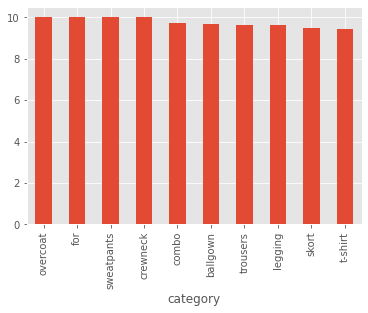

In [43]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['category']).rating.mean().sort_values(ascending=False).head(10).plot.bar()

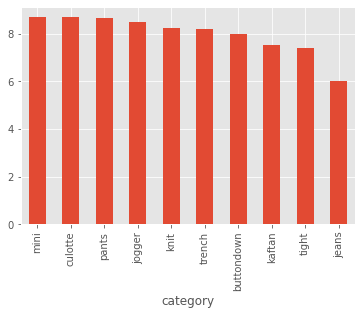

In [44]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['category']).rating.mean().sort_values(ascending=False).tail(10).plot.bar()

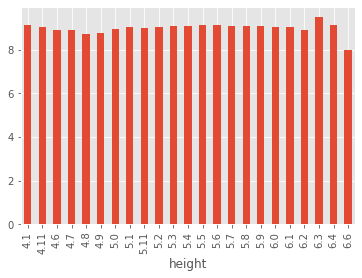

In [45]:
# EXPLORAÇÃO DOS DADOS

assessment.groupby(['height']).rating.mean().plot.bar()

In [46]:
# Cálculo da correlação entre as variáveis numéricas

round((assessment.corr())*100,2)

,bust_size,weight,rating,height,size,age
bust_size,100.00,64.16,-2.05,10.51,64.49,18.57
weight,64.16,100.00,-2.30,25.65,84.52,6.15
rating,-2.05,-2.30,100.00,1.43,-3.71,-3.03
height,10.51,25.65,1.43,100.00,15.24,0.44
size,64.49,84.52,-3.71,15.24,100.00,16.87
age,18.57,6.15,-3.03,0.44,16.87,100.00


### Identificação de dados que contém outliers e a estratégia adotada para lidar com eles

*Outliers podem interferir na forma de ver os dados, atrapalhando algumas modelagens e visualizações, e vai  depender do problema existente, para que se possa ser resolvido e descobrir a sua causa. Podem ser excluídos para que não interfira no Modelo.*

### Visualização dos dados que contêm ou não outliers.

*Completo na exploração de dados.*

### V - Modelagem

### Estratégia adotada de modelagem

*Transformar o problema em solução analisando dados, tratando-os e escolhendo um modelo adequado. Para cada dado diferente, uma abordagem diferente.*

*A estrutura do modelo é: ojetivos, características dos dados, viabilidade de implementação e performance. Existindo diversos modelos disponíveis [no link](https://scikit-learn.org/stable/supervised_learning.html), e algoritmos voltados para problemas de aprendizado supervisionado.* 

*Modelos: algoritmos que possuem uma sequência limitada de ações executáveis, afim de solucionar um problema*

*Escolhendo um modelo, testando-o e o tornando definitivo, será destinado a solucionar um problema.

*É necessário estabelecer um modelo regressivo que prevê a variável 'rating' e identifique fatores que permitirão compreender quais variáveis impactarão a satisfação do cliente. Os dados estarão em formato numérico, e uma parte deles serão selecionados para testar e garantir a qualidade do modelo final.* 

### Identificação das colunas que precisam ser transformadas antes de serem modeladas e suas transformações

 *As três técnicas mais famosas são:

*1. One hot encoding: Transformação das variáveis categóricas em variáveis do tipo 1 ou 0 (ex: pegar a coluna "sabor" que aceita chocolate, morango e baunilha e substituir por três colunas separadas sabor_chocolate, sabor_morango sabor_baunilha, onde 1 significa que é do sabor e 0 que não é do sabor).*

*2. Substituição pela média/frequência: O valor da categoria é substituído pelo número de vezes que ela aparece no dataset ou pela média da variável (Ex: se quer entender salários e a média salarial de homens é 1.200 reais e de mulheres 1.000 reais, ao invés de colocar M ou F para denotar homens e mulheres, colocamos a média salarial deles).*

*3. Extrair informação: Interpretar ou extraír uma informação necessária de uma categoria ou texto (ex: podemos trocar a data de nascimento de alguém que nasceu em "15/06/2000" pela idade dela "21" anos).*

*Nos dados analisados, as colunas 'fit', 'rented_for', 'body_type', 'category' e 'item_id' serãoconvertidas para números. As três primeiras serão tratadas por one hot encoding, por sua pouca variedade e uma razoável estabilidade. A coluna 'category' possui 68 valores e aplicando o one hot encoding, os dados ficarão muitas colunas e consequentemente para cada categoria nova que lançarem, terá que criar uma nova e treinar de novo o modelo. de forma mais simplificada será usada uma mistura da técnica 3 e 2, extrair uma informação (se são categorias comuns ou raras) e substituir os textos pela média da avaliação para cada uma das categorias (o mesmo será feito para item_id).*

### Extração de conteúdos das colunas

#### Conversão das colunas para o numérico

In [47]:
# CONVERSÃO DAS COLUNAS NÃO NUMERICAS PARA VALORES NUMÉRICOS

assessment = pd.get_dummies(assessment,columns = ['fit', 'rented_for', 'body_type'])

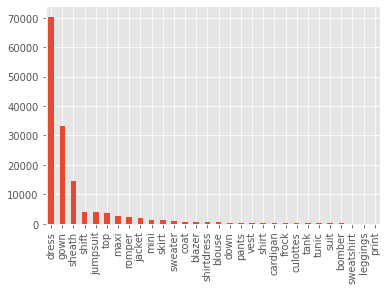

In [48]:
# Gráfico de barras da variável 'category' que possui diversas categorias e poucas relevantes. 

# Ao criar a categoria 'outros', o modelo fica em condições de lidar com novos valores desconhecidos.

assessment['category'].value_counts().sort_values(ascending=False).head(30).plot.bar()

In [49]:
# Quantidade de linhas de cada uma das categorias, são categorizadas das que mais aparecem para as que menos aparecem, e soma de forma acumulativa, dividindo pelo número de linhas, resultando em porcentagem

serie_category_95 = assessment.category.value_counts().sort_values(ascending=False).cumsum()/assessment.shape[0]

# Seleciona as categorias que são menos frequentes, sendo, ao todo menos, de 5% de todos os alugueis

serie_category_95 = serie_category_95[serie_category_95 > 0.95]

# Separa o nome destas categorias para substituí-las por outros

valores_outros = serie_category_95.keys()

# Substitui as categorias selecionadas por "outros"

assessment.loc[assessment['category'].isin(valores_outros), 'category'] = 'outros'

# Mostra as categorias que ficaram

assessment.category.unique()

<StringArray>
[  'romper',     'gown',    'dress',   'sheath',   'outros',   'jacket',
 'jumpsuit',    'shift',      'top',     'mini',     'maxi']
Length: 11, dtype: string

In [50]:
# O próximo passo é substituir os textos  'romper', 'gown', 'dress', dentre outros, pelas médias de avaliações destes grupos.

# Criar o dicionário vazio afim de guardar as médias do modelo.

dicionario_com_valores_medios = {}

# Calcular a média de 'rating' para cada uma das categorias da coluna 'category'

medias = assessment.groupby('category').rating.mean()

# Guardar os valores dentro do dicionário

dicionario_com_valores_medios.update(medias)

# Substituir os valores das categorias pela médias calculadas

assessment['category'] = assessment['category'].map(medias)

In [51]:
# Será feito o mesmo para a coluna 'item_id'

# Calcular a média de 'rating' para cada uma das categorias da coluna 'category'

medias = assessment.groupby('item_id').rating.mean()

# Guardar os valores dentro do dicionário

dicionario_com_valores_medios.update(medias)

# Substituir os valores das categorias pela médias calculadas

assessment['item_id'] = assessment['item_id'].map(medias)

***Ao testar diferentes técnicas, se descobre qual performa é mais adequada em cada situação.***

### Modelo escolhido para este projeto

*Neste projeto é selecionado o [Extreme Gradient Boosting](https://towardsdatascience.com/xgboost-extreme-gradient-boosting-how-to-improve-on-regular-gradient-boosting-5c6acf66c70a), por conta de sua excelente performance, versatilidade e interpretabilidade em dados estruturados. O XGBoost performa em alta qualidade em várias competições de Data Science e em projetos no mercado. Mas ele pode ser substituído caso não traga um resultado adequado ao final do projeto.*

### Garantia que o modelo tenha uma boa performance.

*Dependerá da qualidade e disponibilidade de dados. No momento é olhando para os primeiros dois itens desta tríade. É necessário tomar tais cuidados:*

*1. Separar uma parte dos dados que o modelo não terá acesso para testar a sua performance de maneira não enviesada (dados de treino e teste).*

*2. Selecionar algumas métricas de performance para avaliar o modelo e compreender, visualizando onde atua benéfica ou maléfica.*

*3. Trabalhar a otimização dos hiperparâmetros do modelo, melhorando os dados.*

### Dados divididos em conjuntos de treino e teste.

In [52]:
# DIVIDIR OS DADOS EM TREINO E TESTE

# Embaralhar as linhas do dataframe

assessment = assessment.sample(frac=1).reset_index(drop=True)

# Definir 80% dos dados para treino

porcentagem_treino = int(assessment.shape[0]*0.8)

# Separar 80% das observações para treino

train = assessment[0:porcentagem_treino]

# Separar o restante para teste

test = assessment[porcentagem_treino:assessment.shape[0]]

# Separar as variáveis preditoras (x) da variável resposta (y)

# Selecionar somente a variável resposta

y_train = train['rating'] 
y_test = test['rating'] 

# Tirar a variável resposta e selecionar todo o restante

x_train = train.drop(['rating'], axis=1)
x_test = test.drop(['rating'], axis=1)

In [53]:
# Resultando em

x_train.head(3)

,bust_size,item_id,weight,category,height,size,age,fit_fit,fit_large,fit_small,rented_for_date,rented_for_everyday,rented_for_formal affair,rented_for_other,rented_for_party,rented_for_party: cocktail,rented_for_vacation,rented_for_wedding,rented_for_work,body_type_apple,body_type_athletic,body_type_full bust,body_type_hourglass,body_type_pear,body_type_petite,body_type_straight & narrow
0,36,9.603175,145,9.155385,5.9,16,31,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,34,9.333333,115,9.038874,5.3,1,31,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,34,8.733333,145,9.038874,5.7,8,31,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
# Resultando em

y_train.head(3)

0    10
1    10
2     8
Name: rating, dtype: Int64

***Os dataframes "train" possuem dados que o modelo terá acesso a ser treinado, e os "test" serão usados para testar a performance do modelo. Os dataframes com "X" são as colunas preditoras, e "Y" a resposta ou 'rating'.***

### Aplicação das transformações finais para que os dados possam ser utilizados no modelo.[texto do link](https://)

 *Os dados precisam ter a mesma relevância, para nenhuma ser beneficiada ou prejudicada. Uma das diversas 'técnicas' será apresentada para padronizar o tamanho dos dados para tais ocasiões:*

In [55]:
# APLICAR AS FINALIZAÇÕES NOS DADOS

# Importar o pacote sklearn na pasta preprocessing a função StandardScaler

from sklearn.preprocessing import StandardScaler # MinMaxScaler é uma alternativa divertida também!

x_col = x_train.columns.values

# Instancia ro objeto StandardScaler 

sc = StandardScaler()

# Aplicar a transformação aos dados de treino e teste

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [56]:
# Resultando em

x_train

array([[ 1.10758444,  1.13315517,  0.36001135, ..., -0.37573182,
        -0.39071664, -0.31046021],
       [-0.06689197,  0.54714153, -1.02916661, ..., -0.37573182,
        -0.39071664, -0.31046021],
       [-0.06689197, -0.75587702,  0.36001135, ..., -0.37573182,
        -0.39071664, -0.31046021],
       ...,
       [-0.06689197, -0.34381133, -1.16808441, ..., -0.37573182,
         2.55939959, -0.31046021],
       [-1.24136839,  0.54714153,  0.36001135, ..., -0.37573182,
        -0.39071664, -0.31046021],
       [-1.24136839,  0.22540856, -1.02916661, ..., -0.37573182,
        -0.39071664, -0.31046021]])

In [57]:
# TREINAR O MODELO INICIAL

from xgboost import XGBRegressor

# Criar o modelo

xgb = XGBRegressor(random_state=2021)

# Treinar o modelo com os dados de treino:

xgb.fit(x_train, y_train)

# Prever os resultados para os dados de teste

y_pred = xgb.predict(x_test)

[16:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Medir a performance de seu modelo e sua métrica

*Escolher métricas de performance mais adequadas, e ao final dela descobrir onde, como e quanto o modelo escolhido está tendo erros. As mais famosas escolhidas abrange RMSE, MAE e R², e são acompanhadas do processo de seleção, interpretação e visualização de erros em diferentes aspectos para uma melhor compreensão sobre o comportamento deste modelo.*



In [58]:
# MEDIR A PERFORMANCE E QUALIDADE

# Gerar métricas de performance do modelo

from sklearn import metrics
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('R²:', round(metrics.r2_score(y_test, y_pred)*100,2))

Mean Squared Error (MSE): 1.6982966327158366
Mean Absolute Error (MAE): 1.0089394327895607
R²: 16.69


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


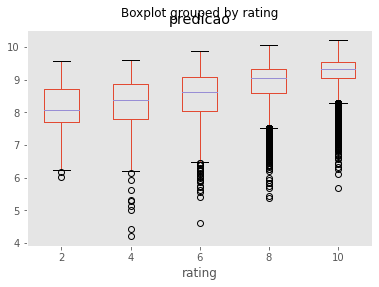

In [59]:
# Será feito um gráfico de histograma para demonstrar o comportamento do erro em diferentes valores de avaliação

# Criar um dataframe só com colunas necessárias

assessment_avaliacao = pd.DataFrame({'rating': y_test, 'predicao': y_pred})

# Plotar o gráfico

assessment_avaliacao.boxplot(by='rating', column='predicao', grid=False)

In [60]:
# Criar uma tabela com outras métricas de erro

# Quantidade de desvio da realidade do modelo por tentativas

assessment_avaliacao['erro'] = assessment_avaliacao['predicao'] - assessment_avaliacao['rating']

# Quantidade de desvio da realidade do modelo por tentativas em termos absolutos

assessment_avaliacao['erro_absoluto'] = abs(assessment_avaliacao['predicao'] - assessment_avaliacao['rating'])

# Quantidade de desvio da realidade do modelo por tentativas em porcentagem

assessment_avaliacao['erro_percentual'] = (assessment_avaliacao['predicao'] / assessment_avaliacao['rating'])-1

# Quantidade de desvio da realidade do modelo por tentativas em porcentagem absoluta

assessment_avaliacao['erro_percentual_absoluto'] = abs((assessment_avaliacao['predicao'] / assessment_avaliacao['rating'])-1)

# Média dos valores calculados acima quebrados por valores de rating observados

assessment_avaliacao_final = assessment_avaliacao.groupby(['rating']).mean().round(4)
assessment_avaliacao_final['frequencia'] = assessment_avaliacao.groupby(['rating']).predicao.count()
assessment_avaliacao_final['frequencia_percentual'] = assessment_avaliacao.groupby(['rating']).predicao.count() / assessment_avaliacao.shape[0]
assessment_avaliacao_final

,predicao,erro,erro_absoluto,erro_percentual,erro_percentual_absoluto,frequencia,frequencia_percentual
rating,,,,,,,
2,8.1204,6.1204,6.1204,3.0602,3.0602,149,0.005097
4,8.2157,4.2157,4.2157,1.0539,1.0539,419,0.014333
6,8.5174,2.5174,2.5218,0.4196,0.4203,1676,0.057331
8,8.9137,0.9137,0.9820,0.1142,0.1228,8054,0.275501
10,9.2251,-0.7749,0.7753,-0.0775,0.0775,18936,0.647739


#### Há um baixo desempenho do modelo. Visualizando as métricas abaixo, pode-se ver:

-*Mean Squared Error (MSE): eleva ao quadrado o erro do modelo, pois quanto o maior o erro, maior o valor dele. Então esta métrica otimizará o modelo dando enfaze aos erros. Mas a interpretação é baixa e por isso não funciona bem para variáveis respostas entre-1 e 1.*

-*Mean Absolute Error (MAE): Métrica simplificada porém de grande poder em questão de magnitude do erro na vida real. Na média, as tentativas do modelo pode desviar da realidade em termos absolutos.*
*No modelo adotado neste projeto, o valor é de 1.076, ou seja,em notas de 0 à 10 o modelo erra, na média, em cerca de 1. Nesta métrica não há um referencial de comparação, podendo dificultar a análise sobre a qualidade do modelo em geral.*

*-[R²](https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o) - link que explica em detalhes: simplifica o R² que é expressa em porcentagem, opu seja, a quantidade que o modelo é melhor do que só usar a média dos dados.
Essa métrica apresenta de forma clara o quão o modelo adotado pode ser bom. Mas no caso aqui apresenta 9.11% de 100%, e não é um bom resultado.*
*Nesta métrica, ela é capaz de que quanto boa a média for como preditora o grau de exigência dela aumenta ou diminui. Então a métrica não é suficiente para uma observação plena do modelo adotado. Com isto é necessário adotar pelo menos 3 métricas de premissas diferentes, e não usar estas métricas para clçassificações ou cluster, pois elas mudam dependendo de cada problema*

*Situação do modelo adotado:*

*A MAE e MSE tem bons resultados, mas o R² não, pois ao calcular as métricas e comparar as tentativas do modelo com os valores reais no boxplot, seria complacente neste gráfico que os valores dos eixos x e y estejam alinhados, mas não estão. O modelo tem uma amplitude tentativas enormes, superestimando e subestimeando valores baixos. Ao fazer uma tabela do valor em que o modelo deveria estimar, o que estimou na média e os erros destas tenativas. Então se observa um erro_percentual_absoluto - quanto mais longe o valor está de 10 em 'rating', mais há erro do modelo, indo de 8.35% em 10 para 329.14% em 2. Portanto as previsões são boas para valores de 'rating' entre 8 e 10, que compõe 92% dos dados, mas há muitos erros para os outros, desproporcionando para valores altos, apresentando diversos espaços a melhorar.*  

*Ao analisar dados, estão desproporcionais, pois tem muito mais alguns valores (10) do que outros (2), sendo bem ruim, pois "estimula" o modelo adotado ficar duvidoso em suas tentativas sobre o valor mais frequente.
*As diversas técnicas existentes são, [técnicas](https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100) - informado como consulta.*

### Examinando o grau de importância referente a satisfação em cada coluna

*Haverá extração das colunas mais relevantes que impactarão na predição da satisfação do cliente em questão de quanto melhor o modelo mais a será levado a opinião sobre esta intenção.*

*É de grande relevância a medição da variável do quanto o modelo é prejudicado, ou seja, se ele não tem acesso a informação de uma coluna específica. 
*Então a coluna que conseguiu prever a satisfação é (fit_fit + fit_large + fit_small) com cerca de 65.08% de toda a importância, seguida pelo id do produto (item_id) com 19.12% e em terceiro a ocasião do aluguel (rented_for...) com 5.94%.*

*Este dados serão acompanhados de gráficos, gerados na análise exploratória, e se os resultados ficarem diferentes do que foi encontrado, terá um problema.*

*Por fim a variável não cusa o resultado, mas sim estão correlacionadas, epor isso para provar a causalidade, é necessário que "A" cause "B", "B" não cause "A" e que "A" aconteça antes de "B".*

In [61]:
# Analisar a importância dos features

# Extrair a importância dos features

importances = xgb.feature_importances_

# Transformar os valores extraidos em um dataframe organizado

feature_importances = pd.DataFrame({"feature": x_col, "importance":importances*100})

# Ordenar os valores do mais importante para o menos

feature_importances.sort_values("importance", ascending=False).head(30)

,feature,importance
7,fit_fit,57.978844
1,item_id,19.805986
9,fit_small,3.436148
8,fit_large,3.366457
2,weight,2.538455
6,age,1.666749
5,size,1.386900
13,rented_for_other,1.368272
11,rented_for_everyday,1.219126
18,rented_for_work,0.895175


### Otimização do modelo

*Há diversas maneiras de otimizar um modelo através dos dados que colaboram no aprendizado (feature engineering e subamostragens). è possível criar modelos especializados para darem assistência no pré-processar dos dados no modelo final e ajustando o modelo escolhido, mostrando de forma simples os hiperparâmetros (configurações do modelo a ser adotado, se ajustando de acordo com o aprendizado do modelo), para melhorar o desempenho do modelo.*
*Por fim será escolhido aleatóriamente e testado com intuíto de resultar em alguma melhoria, e este método é conhecido como Random Grid Search (RGS).*

In [62]:
# Serão escolhidos os hiperparâmetros e os valores para teste, e os valores determinados aleatóriamente

random_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1, 0.12, 0.15],
    'max_depth': [1, 3, 5, 7, 10, 12, 15, 17, 20, 23, 25],
    'min_child_weight': [1, 3, 5, 7, 10, 12, 15],
    'subsample': [0.3, 0.5, 0.7, 1.0],
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9, 0.12, 0.15],
    'n_estimators' : [400, 440, 480, 520, 560, 600, 640, 680, 720],
}

# Foi criado um dicionário que armazena os testes selecionados e seus resultados

hyper_dict = {
    'learning_rate': [],
    'max_depth': [],
    'min_child_weight': [],
    'subsample': [],
    'colsample_bytree': [],
    'n_estimators': [],
    'mean_squared_error': [],
    'mean_absolute_error': [],
    'time_to_fit': []
}    

In [63]:
import random as rd
from datetime import datetime

# Foram escolhidos quantas tentativas serão feitas

n_times = 30

# Cada uma delas serão feitas dentro do FOR

for i in range(n_times):
    
    # A hora é determinada para iniciar a seleção aleatória

    now_b = datetime.now()
    
    # A seleção é feita para cada um dos hiperparâmetros

    ss = rd.choice(random_grid['subsample'])
    ns = rd.choice(random_grid['n_estimators'])
    mcw = rd.choice(random_grid['min_child_weight'])
    md = rd.choice(random_grid['max_depth'])
    lr = rd.choice(random_grid['learning_rate'])
    cst = rd.choice(random_grid['colsample_bytree'])


    # O modelo é escolhido, passando os hiperparâmetros selecionados

    xgb = XGBRegressor(random_state=2021, use_label_encoder=False, objective ='reg:squarederror',
                        subsample= ss,
                        n_estimators= ns,
                        min_child_weight= mcw,
                        max_depth= md,
                        learning_rate= lr, 
                        colsample_bytree= cst)

    # É treinado o modelo com os dados de treino

    xgb.fit(x_train, y_train)

    # São geradas as previsões do modelo para os dados de teste

    y_pred = xgb.predict(x_test)
    
    # Há a medição da performance do modelo em 3 métricas diferentes

    mse = metrics.mean_squared_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = round(metrics.r2_score(y_test, y_pred)*100,2)
    
    # é marcada a hora para o término do treino

    now_e = datetime.now()
    
    # É calculado o tempo levado para a tentativa

    td = now_e-now_b
    
    # E por fim são salvos os resultados no dicionário que foi criado anteriormente

    hyper_dict['subsample'].append(ss)
    hyper_dict['n_estimators'].append(ns)
    hyper_dict['min_child_weight'].append(mcw)
    hyper_dict['max_depth'].append(md)
    hyper_dict['learning_rate'].append(lr)
    hyper_dict['colsample_bytree'].append(cst)
    hyper_dict['mean_squared_error'].append(mse)
    hyper_dict['mean_absolute_error'].append(mae)
    hyper_dict['time_to_fit'].append(td.seconds)
    
    # A cada 10 tentativas, é salvo os resultados em um dataframe

    if i in range(0,n_times,10):
        hassessment = pd.DataFrame(hyper_dict)
        hassessment.to_csv('hassessment.csv')
    
    # É feita a exposição resultados na tela

    print(i, td.seconds,'seconds','mae:', mae, 'R²:', r2)


0 19 seconds mae: 1.1354279315544233 R²: 9.13
1 53 seconds mae: 1.0067420972064784 R²: 15.91
2 133 seconds mae: 1.0285024278147763 R²: 8.3
3 617 seconds mae: 1.05320892687037 R²: 2.14
4 23 seconds mae: 1.006133787248842 R²: 15.93
5 454 seconds mae: 1.147459118210634 R²: -16.03
6 33 seconds mae: 1.0894923280281548 R²: 12.34
7 165 seconds mae: 1.0832729886345918 R²: -3.0
8 43 seconds mae: 1.004273686443576 R²: 17.08
9 23 seconds mae: 1.0065480758547334 R²: 15.73
10 12 seconds mae: 1.1567850765356933 R²: 7.34
11 51 seconds mae: 1.0028976708061352 R²: 17.29
12 90 seconds mae: 1.002939056606375 R²: 17.14
13 46 seconds mae: 1.0029117267125445 R²: 17.1
14 45 seconds mae: 1.0237020639483625 R²: 16.35
15 18 seconds mae: 1.006971609497018 R²: 16.73
16 56 seconds mae: 1.0216118460633878 R²: 11.13
17 122 seconds mae: 1.0348543501131886 R²: 15.84
18 37 seconds mae: 1.0117185170293108 R²: 14.12
19 39 seconds mae: 1.0201962374870988 R²: 15.41
20 34 seconds mae: 1.0068588624323833 R²: 16.81
21 36 seco

In [64]:
# A amostragem dos resultados da seleção aleatória ordenados do melhor para o pior

hassessment = pd.DataFrame(hyper_dict)
hassessment.sort_values(['mean_squared_error'], ascending=True)

,learning_rate,max_depth,min_child_weight,subsample,colsample_bytree,n_estimators,mean_squared_error,mean_absolute_error,time_to_fit
11,0.05,5,12,0.7,0.50,480,1.686104,1.002898,51
26,0.03,7,10,0.7,0.90,480,1.688320,1.003229,99
12,0.05,5,10,0.7,0.70,720,1.689292,1.002939,90
13,0.15,3,5,1.0,0.70,720,1.690099,1.002912,46
8,0.07,3,15,0.7,0.50,640,1.690352,1.004274,43
21,0.07,3,15,0.5,0.30,640,1.690685,1.004839,36
20,0.03,3,7,0.3,0.70,480,1.695960,1.006859,34
15,0.07,5,10,1.0,0.15,400,1.697499,1.006972,18
23,0.07,5,5,0.5,0.12,560,1.698747,1.004827,30
29,0.15,5,3,0.7,0.10,680,1.701298,1.004034,29


***Em 30 tentativas de otimização, é possível treinar uma versão mais adequada do modelo escolhido, e precisa colocar os valores que aparecem na primeira linha da célula de cima como os valores finais e retreiná-lo. Mas a melhora como esperada.***

### VI - Conclusões

### Identificação dapossível solução

*A solução ajudou a entender o problema trazendo aprendizados, mas não foi das melhores escolhidas, pois a implementação trouxe um baixo desempenho.*


### Apresentando os aprendizados diante deste projeto

*Houve 3 grandes aprendizados:*

*1. Níveis de insatisfação razoavelmente baixos, porém não serão de grande impacto se eles não gerarem altos custos para a loja.* 

*2. Na extração de importância dos features, resultou em tais fatores relevantes a satisfação em função do ajuste médio/baixo do modelo aos dados:*
    - *O cabimento da peça, mostrando a utilidade da variedade e o auxílio dos usuários na escolha do tamanho da peça.*
    - *O produto especificamente diz a necessidade da análise aprofundada dos feedbacks negativos obtidos dos clientes que adquiriram os produtos, e a evolução do processo de curadoria, a preservação e o descarte das peças.*
    - *Na questão do aluguel, pode haver ocasiões do sortimento de peças estar falhando.*

*3. Em todas as fases adotadas, demonstram como o modelo e a análise poderiam ser ajustados para dar um resultado melhor, permitindo assim adquirir um aprendizado à todos leitores.*

### Possíveis melhoras a serem adotadas para o futuro:

- *Possíveis problemas levantados, poderiam ser repriorizados e ter soluções próprias.*
- *Uma estimativa de preço do aluguel, colaboraria com a estimativa do prejuízo em questão da má experiência.*
- *Há a possibilidade de repensar sobre adicionar colunas excluídas neste processo de análise.*
- *Colocar técnicas de análise de textos nas variáveis de 'review'.*
- *Implementar esta base com mais dados com intuito de complementar a análise.*
- *Esperimentar outras estratégias para soluçionar o missing values.*
- *Experimentar outras estratégias para solucionar os dados categóricos.*
- *Refazer a estratégia de modelagem.*
- *Utilizar outros algoritmos/modelos para modelar.*
- *Substituir por outra estratégia de tratamento para numérico e escalabilização dos dados.*
- *Trocar as métricas de performance para otmizar o modelo.*
- *Experimentar outros métodos de otimização do modelo.*
- * Adotar técnicas para lidar com o desbalanceamento dos dados.*

### Identificação de outros problemas a serem resolvidos:

*1. Precisa colaborar com os clientes em suas escolhas de roupas e seus devidos tamanhos.*
*2. Examinar os feedbacks dos clientes para trabalhar a melhora no processo de compra.* 
*3. Analisar os dados dos clientes compradores para fazerem parte de uma rede de clientes parecidos (clusters) e oferecer promoções e oportunidades exclusivas para estes.*
*4. dar a tenção aos produtos de baixa enfase para remoção ou adapta-los de acordo com a necessidade do cliente, gerando a sua satisfação.*
